In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Index(['Node Number', 'X Location (mm)', 'Y Location (mm)', 'Z Location (mm)',
       'Total Deformation (mm)'],
      dtype='object')


Text(0.5, 0, 'deformation (mm)')

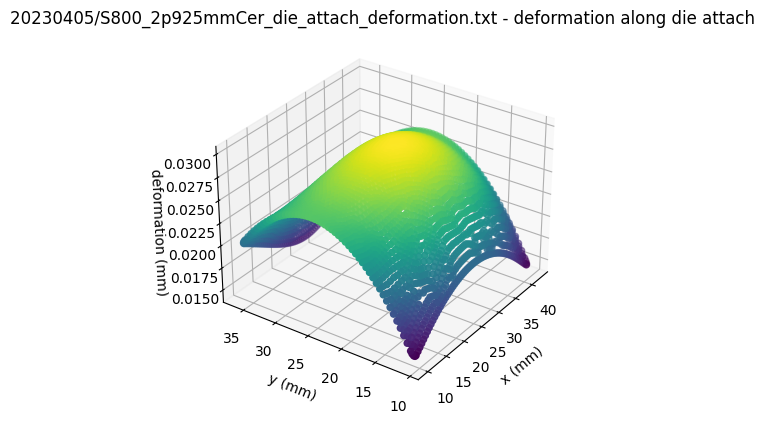

In [238]:
# filename = "20230405/S600_2p925mmCer_die_attach_deformation.txt"
# filename = "20230405/S600_3p785mmCer_die_attach_deformation.txt"
filename="20230405/S800_2p925mmCer_die_attach_deformation.txt"
# filename="20230405/S800_3p785mmCer_die_attach_deformation.txt"
# filename="20230405/S800_3p9mmCer_die_attach_deformation.txt"
# filename="20230405/S800_4p0mmCer_die_attach_deformation.txt"
# filename="20230405/S800_4p1mmCer_die_attach_deformation.txt"
# filename="20230405/S800_4p2mmCer_die_attach_deformation.txt"

C_NODE = "Node Number"
C_X = "X Location (mm)"
C_Y = "Y Location (mm)"
C_Z = "Z Location (mm)"
C_DEF = "Total Deformation (mm)"

df = pd.read_csv(filename, sep="\t")
cols = df.columns
print(cols)
df

ax = plt.axes(projection='3d')
ax.scatter(df[C_X], df[C_Y], df[C_DEF], c=df[C_DEF], cmap='viridis')

ax.view_init(30, -145)
ax.ticklabel_format(style='plain', axis='z', scilimits=(0, 0))
ax.set_title(f'{filename} - deformation along die attach')
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_zlabel('deformation (mm)')

In [239]:
# Find bounding box of data
x_min = df.iloc[0][C_X]
y_min = df.iloc[0][C_Y]
x_max = df.iloc[0][C_X]
y_max = df.iloc[0][C_Y]
for index, row in df.iterrows():
    # print(row[C_X], row[C_Y])
    x = float(row[C_X])
    y = float(row[C_Y])
    if y > y_max:
        y_max = y
    if x > x_max:
        x_max = x
    if y < y_min:
        y_min = y
    if x < x_min:
        x_min = x

print(f"Min: ({x_min},{y_min})  Max: ({x_max},{y_max})")

Min: (9.81,10.69)  Max: (42.44,36.31)


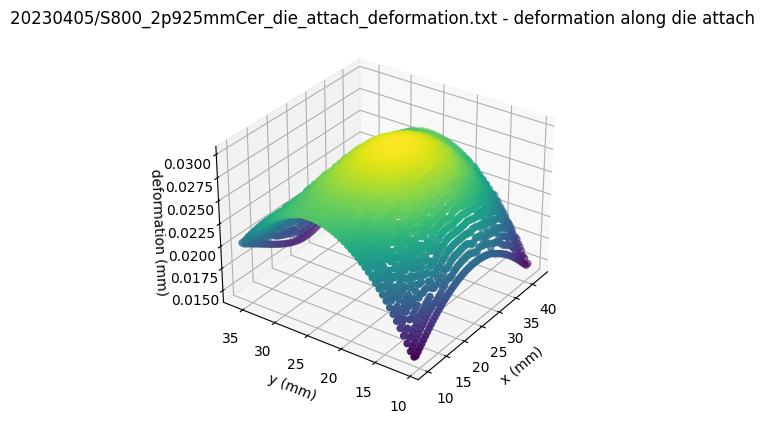

In [240]:
# collect deformation along this axis by finding closest node
resolution = 0.5
x_steps = np.arange(x_min, x_max, resolution)
y_steps = np.arange(y_min, y_max, resolution)

data = []
for p_x in x_steps:
    for p_y in y_steps:
        df_closest = (
            df.copy(deep=True)
            .assign(d=(p_x - df[C_X]) ** 2 + (p_y - df[C_Y]) ** 2)
            .sort_values("d")
            .drop("d", axis=1)
        )
        # biased average
        # sum_dist = sum([(p_x - df_closest.iloc[i][C_X]) ** 2 + (p_y - df_closest.iloc[i][C_Y]) ** 2 for i in range(0,2)])
        # avg = (
        #     sum([df_closest.iloc[i][C_DEF] * ( (p_x - df_closest.iloc[i][C_X]) ** 2 + (p_y - df_closest.iloc[i][C_Y]) ** 2 )/sum_dist for i in range (0,2)])
        #     # / sum_dist
        # )
        # data.append({C_X: p_x, C_Y: p_y, C_DEF: avg})
        data.append({C_X: p_x, C_Y: p_y, C_DEF: df_closest.iloc[0][C_DEF]})

df_ortho = pd.DataFrame(data)

ax = plt.axes(projection='3d')
ax.scatter(df_ortho[C_X], df_ortho[C_Y], df_ortho[C_DEF], c=df_ortho[C_DEF], cmap='viridis')
ax.view_init(30, -145)
ax.set_title(f'{filename} - deformation along die attach')
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_zlabel('deformation (mm)')
ax.ticklabel_format(style='plain', axis='z', scilimits=(0, 0))

Function:
            4             3             2
-9.005e-08 x + 8.342e-06 x - 0.0003475 x + 0.007042 x - 0.02475
Average: 0.025836372740360988


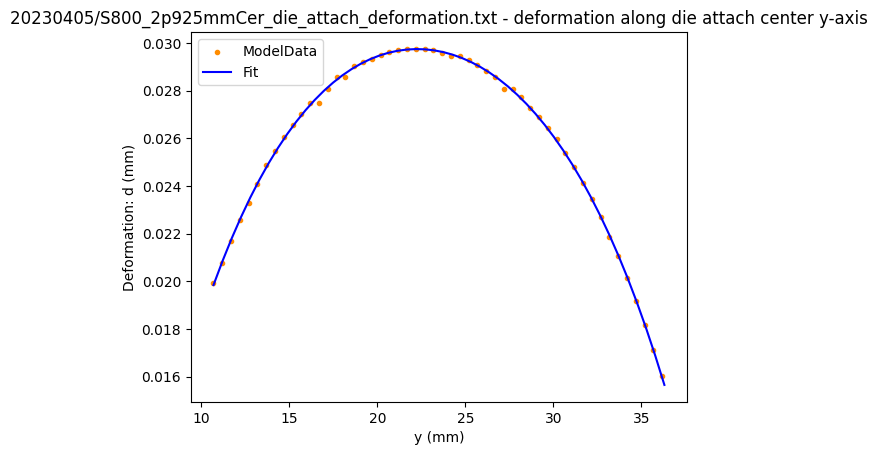

In [265]:
middle_x = x_steps[len(x_steps)//2]

df_centery = df_ortho.loc[df_ortho[C_X] == middle_x]

# get x and y vectors
x = df_centery[C_Y]
y = df_centery[C_DEF]

# calculate polynomial
z = np.polyfit(x, y, 4) # Find 2nd order roots
f = np.poly1d(z) # Create function with roots
print(f"Function:")
print(f)


# calculate new x's and y's
x_new = np.linspace(y_min, y_max, 50)
y_new = f(x_new)

print(f"Average: {np.mean(f(x_new))}")

plt.scatter(x, y, marker='.', color="darkorange", label="ModelData")
plt.plot(x_new, y_new, color="blue", label="Fit")
plt.title(f'{filename} - deformation along die attach center y-axis')
plt.xlabel("y (mm)")
plt.ylabel("Deformation: d (mm)")
plt.legend(loc="upper left")

$$ 
D(x,y) = \text{deformation at point}
$$

The second derivative of a function D can be used to determine the concavity of the graph of D

$$
\text{rate of change of deformation over unit distance} = \frac{\partial^2 D}{\partial y^2}
$$
$$

$$
$$
\text{Laplacian}  = \Delta{D} = \frac{\partial^2 D}{\partial x^2}+\frac{\partial^2 D}{\partial y^2}
$$

In [267]:
# Take second derivative and print value
print(f.deriv(m=2))

            2
-1.081e-06 x + 5.005e-05 x - 0.0006949


In [243]:
# Plot seocnd derivative
# plt.plot(x_new, f.deriv(m=2)(x_new), label="d^2(defl)/dy^2")
# plt.title(f'{filename} - The rate of change of deformation')
# plt.ylabel("Deformation mm/mm^2")
# plt.xlabel("Y position")
# plt.legend(loc="upper left")
# print(f"Average: {np.mean(f.deriv(m=2)(x_new))}")

      X Location (mm)  Y Location (mm)      d2fx    d2fy       d2f
0                9.81            10.69 -0.000042 -0.0001 -0.000142
1                9.81            11.19 -0.000042 -0.0001 -0.000143
2                9.81            11.69 -0.000044 -0.0001 -0.000144
3                9.81            12.19 -0.000044 -0.0001 -0.000144
4                9.81            12.69 -0.000045 -0.0001 -0.000145
...               ...              ...       ...     ...       ...
3427            42.31            34.19  0.000016 -0.0001 -0.000084
3428            42.31            34.69  0.000020 -0.0001 -0.000080
3429            42.31            35.19  0.000024 -0.0001 -0.000076
3430            42.31            35.69  0.000028 -0.0001 -0.000072
3431            42.31            36.19  0.000032 -0.0001 -0.000068

[3432 rows x 5 columns]


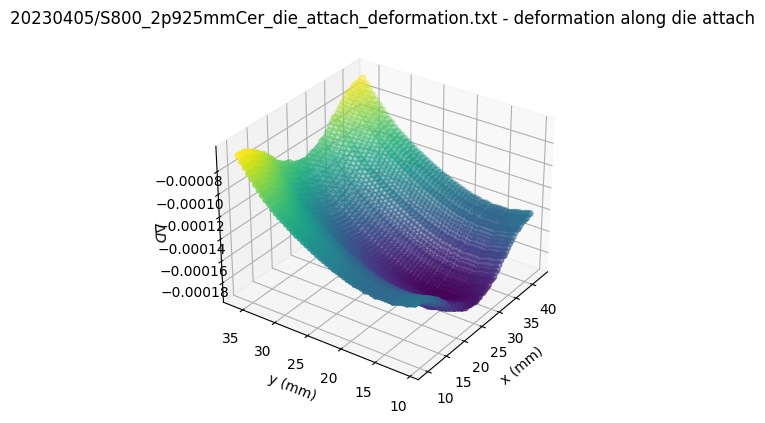

In [273]:

data = []
# print(x_steps,y_steps)
for x_pos in x_steps:
    for y_pos in y_steps:
        # print(x_pos, y_pos)
        
        df_x = df_ortho.loc[df_ortho[C_X] == x_pos]
        # calculate polynomial
        r = np.polyfit(df_x[C_Y], df_x[C_DEF], 2) # Find 2nd order roots
        f = np.poly1d(r) # Create function with roots
        d2fy = f.deriv(m=2) # find 2nd derivative

        df_y = df_ortho.loc[df_ortho[C_Y] == y_pos]
        # calculate polynomial
        r = np.polyfit(df_y[C_X], df_y[C_DEF], 2) # Find 2nd order roots
        f = np.poly1d(r) # Create function with roots
        d2fx = f.deriv(m=2) # find 2nd derivative

        data.append({C_X: x_pos, C_Y: y_pos, 'd2fx': d2fx(x_pos), 'd2fy': d2fy(y_pos), 'd2f': d2fy(y_pos) + d2fx(x_pos)})

df_2ndder = pd.DataFrame(data)
print(df_2ndder)


ax = plt.axes(projection='3d')
ax.scatter(df_2ndder[C_X], df_2ndder[C_Y], df_2ndder['d2f'], c=df_2ndder['d2f'], cmap='viridis')
ax.view_init(30, -145)
ax.set_title(f'{filename} - deformation along die attach')
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_zlabel(r'$\Delta{D}$')
ax.ticklabel_format(style='plain', axis='z', scilimits=(0, 0))

In [245]:
print(df_2ndder['d2f'].min())
df_2ndder.iloc[df_2ndder['d2f'].idxmin(),:]

-0.00018911971612602801


X Location (mm)    26.810000
Y Location (mm)    16.190000
d2fx               -0.000047
d2fy               -0.000142
d2f                -0.000189
Name: 1779, dtype: float64

In [253]:
def del2(M):
    dx = 1
    dy = 1
    rows, cols = M.shape
    dx = dx * np.ones ((1, cols - 1))
    dy = dy * np.ones ((rows-1, 1))

    mr, mc = M.shape
    D = np.zeros ((mr, mc))

    if (mc >= 3):
        ## x direction
        ## left and right boundary
        D[:, 0] = (M[:, 0] - 2 * M[:, 1] + M[:, 2]) / (dx[:,0] * dx[:,1])
        D[:, mc-1] = (M[:, mc - 3] - 2 * M[:, mc - 2] + M[:, mc-1]) \
            / (dx[:,mc - 3] * dx[:,mc - 2])

        ## interior points
        tmp1 = D[:, 1:mc - 1] 
        tmp2 = (M[:, 2:mc] - 2 * M[:, 1:mc - 1] + M[:, 0:mc - 2])
        tmp3 = np.kron (dx[:,0:mc -2] * dx[:,1:mc - 1], np.ones ((mr, 1)))
        D[:, 1:mc - 1] = tmp1 + tmp2 / tmp3

    if (mr >= 3):
        ## y direction
        ## top and bottom boundary
        D[0, :] = D[0,:]  + \
            (M[0, :] - 2 * M[1, :] + M[2, :] ) / (dy[0,:] * dy[1,:])

        D[mr-1, :] = D[mr-1, :] \
            + (M[mr-3,:] - 2 * M[mr-2, :] + M[mr-1, :]) \
            / (dy[mr-3,:] * dx[:,mr-2])

        ## interior points
        tmp1 = D[1:mr-1, :] 
        tmp2 = (M[2:mr, :] - 2 * M[1:mr - 1, :] + M[0:mr-2, :])
        tmp3 = np.kron (dy[0:mr-2,:] * dy[1:mr-1,:], np.ones ((1, mc)))
        D[1:mr-1, :] = tmp1 + tmp2 / tmp3

    return D / 4

def laplacian(dx, dy, w):
    """ Calculate the laplacian of the array w=[] """
    laplacian_xy = np.zeros(w.shape)
    for y in range(w.shape[1]-1):
        laplacian_xy[:, y] = (1/dy)**2 * ( w[:, y+1] - 2*w[:, y] + w[:, y-1] )
    for x in range(w.shape[0]-1):
        laplacian_xy[x, :] = laplacian_xy[x, :] + (1/dx)**2 * ( w[x+1,:] - 2*w[x,:] + w[x-1,:] )
    return laplacian_xy

def polyfit2d(x, y, z, kx=3, ky=3, order=None):
    '''
    Two dimensional polynomial fitting by least squares.
    Fits the functional form f(x,y) = z.

    Notes
    -----
    Resultant fit can be plotted with:
    np.polynomial.polynomial.polygrid2d(x, y, soln.reshape((kx+1, ky+1)))

    Parameters
    ----------
    x, y: array-like, 1d
        x and y coordinates.
    z: np.ndarray, 2d
        Surface to fit.
    kx, ky: int, default is 3
        Polynomial order in x and y, respectively.
    order: int or None, default is None
        If None, all coefficients up to maxiumum kx, ky, ie. up to and including x^kx*y^ky, are considered.
        If int, coefficients up to a maximum of kx+ky <= order are considered.

    Returns
    -------
    Return paramters from np.linalg.lstsq.

    soln: np.ndarray
        Array of polynomial coefficients.
    residuals: np.ndarray
    rank: int
    s: np.ndarray

    '''

    # grid coords
    x, y = np.meshgrid(x, y)
    # coefficient array, up to x^kx, y^ky
    coeffs = np.ones((kx+1, ky+1))

    # solve array
    a = np.zeros((coeffs.size, x.size))

    # for each coefficient produce array x^i, y^j
    for index, (j, i) in enumerate(np.ndindex(coeffs.shape)):
        # do not include powers greater than order
        if order is not None and i + j > order:
            arr = np.zeros_like(x)
        else:
            arr = coeffs[i, j] * x**i * y**j
        a[index] = arr.ravel()

    # do leastsq fitting and return leastsq result
    return np.linalg.lstsq(a.T, np.ravel(z), rcond=None)

In [270]:
data = np.empty((len(y_steps),0))
# print(x_steps,y_steps)
for x_pos in x_steps:
    col = []
    for y_pos in y_steps:
        df_val = df_ortho.loc[(df_ortho[C_X] == x_pos) & (df_ortho[C_Y] == y_pos)]
        col.append(df_val[C_DEF])
    npcol = np.vstack(col)
    data = np.append(data,npcol,1)

# print(data.shape)
# print(data)
# con = del2(data)
con = laplacian(0.5,0.5,data)
# print(con.shape)
# print(con)

# eq = np.linalg.lstsq(data, data)
# print(eq)
soln = polyfit2d(x_steps,y_steps, data)
print(soln)
fitted_surf = np.polynomial.polynomial.polygrid2d(x_steps,y_steps, soln.reshape((3+1,3+1)))
plt.matshow(fitted_surf)

plt.matshow(data)
plt.matshow(con)
# ax = plt.axes(projection='3d')
# ax.scatter(con[:, 0], con[:, 1], con[:, 2], c=con[:, 2], cmap='hot')

(array([-6.30112366e-03, -8.95691464e-05,  9.98638826e-06, -1.91444360e-07,
        1.27515329e-03,  1.65152972e-04, -4.18350915e-06,  2.37489884e-08,
       -1.07333194e-05, -5.65405546e-06,  1.52925838e-07, -1.03901766e-09,
        1.97589245e-08,  1.61745934e-08, -9.54955102e-10,  1.50722915e-11]), array([0.00018158]), 16, array([4.19936102e+10, 2.23548448e+08, 1.93645889e+08, 3.27325116e+06,
       2.82859947e+06, 1.03085297e+06, 5.90246044e+04, 5.75709776e+04,
       1.50940019e+04, 1.50577438e+04, 3.14211106e+02, 2.65478083e+02,
       2.20479174e+02, 4.60075602e+00, 3.87785753e+00, 8.09195532e-02]))


AttributeError: 'tuple' object has no attribute 'reshape'